In [1]:
import matplotlib.pyplot as plt

import sys
sys.path.append("../../nansat/")
from nansat import Nansat

In [2]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt, make_path_filter

local_api = SentinelAPI(None, None, "https://colhub-archive.met.no" ,timeout=180)
api = SentinelAPI(None, None, "https://scihub.copernicus.eu/dhus", timeout=180)

data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/"

In [3]:
# import dict containing metadata for in-situ data
# https://raw.githubusercontent.com/jerabaul29/MachineOcean_WP1_WHOI/main/mo_whoi_data/data_files/in_situ_dict.py
# from private repo at https://github.com/jerabaul29/MachineOcean_WP1_WHOI
import time
import os

os.environ["TZ"] = "UTC"
time.tzset()

import datetime
import pytz

utc_timezone = pytz.timezone("UTC")

wd = os.getcwd()

os.chdir("../../MachineOcean_WP1_WHOI/mo_whoi_data/data_files")

import in_situ_dict
in_situ_obs = in_situ_dict.get_in_situ_metadata()

os.chdir(wd)

print(in_situ_obs.keys())

dict_keys(['Endurance_8', 'Irminger_7', 'SPURS2', 'Endurance_4', 'Irminger_6', 'Pioneer_5', 'CLIMODE', 'Endurance_9', 'Pioneer_10', 'SouthernOcean2', 'Endurance_3', 'Pioneer_3', 'SPURS1', 'Endurance_7', 'Irminger_3', 'Pioneer_7', 'Pioneer_6', 'Pioneer_8'])


In [4]:
in_situ_obs['Pioneer_7']

{'datetime_start': datetime.datetime(2017, 6, 9, 13, 11, 0, 17529, tzinfo=<UTC>),
 'datetime_end': datetime.datetime(2017, 10, 31, 23, 12, 0, 16778, tzinfo=<UTC>),
 'type': 'whoi_buoy',
 'lat': [40.1334],
 'lon': [-70.7785],
 'nc_data_location': 'received, exported from .mat'}

In [5]:
##### read pickled imported in-situ measurements metadata with attached colocated Sentinel-1 sat products metadata
# (to avoid having to rerun the API search)
import pickle

with open('in_situ_obs.pickle', 'rb') as handle:
    in_situ_obs = pickle.load(handle)

with open('products_scihub.pickle', 'rb') as handle:
    products_scihub = pickle.load(handle)

In [6]:
in_situ_obs.keys()

dict_keys(['Endurance_8', 'Irminger_7', 'SPURS2', 'Endurance_4', 'Irminger_6', 'Pioneer_5', 'CLIMODE', 'Endurance_9', 'Pioneer_10', 'SouthernOcean2', 'Endurance_3', 'Pioneer_3', 'SPURS1', 'Endurance_7', 'Irminger_3', 'Pioneer_7', 'Pioneer_6', 'Pioneer_8'])

In [7]:
in_situ_obs['Pioneer_7']['products']

OrderedDict([('7e1d1641-af53-4486-bb45-8411c61d1aba',
              {'title': 'S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27',
               'link': "https://scihub.copernicus.eu/dhus/odata/v1/Products('7e1d1641-af53-4486-bb45-8411c61d1aba')/$value",
               'link_alternative': "https://scihub.copernicus.eu/dhus/odata/v1/Products('7e1d1641-af53-4486-bb45-8411c61d1aba')/",
               'link_icon': "https://scihub.copernicus.eu/dhus/odata/v1/Products('7e1d1641-af53-4486-bb45-8411c61d1aba')/Products('Quicklook')/$value",
               'summary': 'Date: 2017-10-22T22:42:24.875Z, Instrument: SAR-C SAR, Mode: VV VH, Satellite: Sentinel-1, Size: 1.61 GB',
               'ondemand': 'false',
               'ingestiondate': datetime.datetime(2017, 10, 23, 5, 16, 24, 259000),
               'beginposition': datetime.datetime(2017, 10, 22, 22, 42, 24, 875000),
               'endposition': datetime.datetime(2017, 10, 22, 22, 42, 49, 874000),
               'missi

In [8]:
# (might have to compile some code in Nansat, see warning when importing from nansat)
# (in nansat root dir: python setup.py build_ext --inplace)

# Install nansat dependency (not found in conda env production-10-2022)
#%pip install --user pythesint

# if you are running on you own laptop you will also need to do:
#!sudo apt-get install libgdal-dev
#!pip install --user GDAL==$(gdal-config --version | awk -F'[.]' '{print $1"."$2}')

# list a SAR product with Nansat
n = Nansat(data_dir + "S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27.SAFE")
print(n)



----------------------------------------
/lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27.SAFE----------------------------------------
Mapper: sentinel1_l1Band : 1 DN_VH
  dataType: 2
  name: DN_VH
  SourceBand: 1
  SourceFilename: /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27.SAFE/measurement/s1a-iw-grd-vh-20171022t224224-20171022t224249-018932-01ffe8-002.tiff
Band : 2 DN_VV
  dataType: 2
  name: DN_VV
  SourceBand: 1
  SourceFilename: /lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27.SAFE/measurement/s1a-iw-grd-vv-20171022t224224-20171022t224249-018932-01ffe8-001.tiff
Band : 3 sigmaNought_VH
  dataType: 7
  name: sigmaNought_VH
  SourceBand: 1
  SourceFilename: /vsimem/VS1GLEJ88L.vrt
Band : 4 noise_VH
  dataType: 7
  name: noise_VH
  Sou

Variable           Type              Data/Info
----------------------------------------------
Nansat             type              <class 'nansat.nansat.Nansat'>
SentinelAPI        type              <class 'sentinelsat.sentinel.SentinelAPI'>
api                SentinelAPI       <sentinelsat.sentinel.Sen<...>object at 0x150a1c330940>
b1                 ndarray           16701x25911: 432739611 elems, type `uint16`, 865479222 bytes (825.3853054046631 Mb)
data_dir           str               /lustre/storeB/project/IT<...>-ocean/data_raw/sentinel/
datetime           module            <module 'datetime' from '<...>b/python3.9/datetime.py'>
geojson_to_wkt     function          <function geojson_to_wkt at 0x1509e92023a0>
handle             BufferedReader    <_io.BufferedReader name=<...>'products_scihub.pickle'>
in_situ_dict       module            <module 'in_situ_dict' fr<...>a_files/in_situ_dict.py'>
in_situ_obs        dict              n=18
local_api          SentinelAPI       <sentinelsat

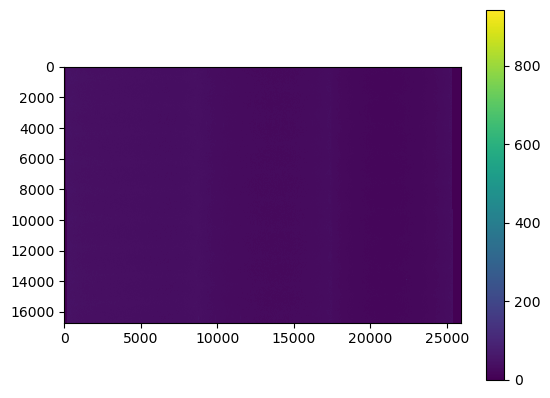

In [9]:
%matplotlib inline
# plot a SAR product with Nansat
b1 = n[1]

%whos
plt.imshow(b1);plt.colorbar()
plt.show()

# write to file
#n.write_figure('map.png', pltshow=True)

In [10]:
b1.max()

942

In [11]:
#extent = n.crop_lonlat(lonlim=[-70.77,-70.78], latlim=[40.13,40.14]) 
epsilon =  0.0005
n.crop_lonlat(lonlim=[-70.7785 - epsilon, -70.7785 + epsilon], latlim=[40.1334 - epsilon, 40.1334 + epsilon])
n
#'lat': [40.1334],
#'lon': [-70.7785]

----------------------------------------
/lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27.SAFE----------------------------------------
Mapper: sentinel1_l1Band : 1 DN_VH
  dataType: 2
  name: DN_VH
  SourceBand: 1
  SourceFilename: /vsimem/OYGHOEYITM.vrt
Band : 2 DN_VV
  dataType: 2
  name: DN_VV
  SourceBand: 2
  SourceFilename: /vsimem/OYGHOEYITM.vrt
Band : 3 sigmaNought_VH
  dataType: 7
  name: sigmaNought_VH
  SourceBand: 3
  SourceFilename: /vsimem/OYGHOEYITM.vrt
Band : 4 noise_VH
  dataType: 7
  name: noise_VH
  SourceBand: 4
  SourceFilename: /vsimem/OYGHOEYITM.vrt
Band : 5 sigmaNought_VV
  dataType: 7
  name: sigmaNought_VV
  SourceBand: 5
  SourceFilename: /vsimem/OYGHOEYITM.vrt
Band : 6 noise_VV
  dataType: 7
  name: noise_VV
  SourceBand: 6
  SourceFilename: /vsimem/OYGHOEYITM.vrt
Band : 7 look_direction
  colormap: jet
  dataType: 6
  long_name: Sensor Azimuth Angle
  minmax: 0 360
  name: lo

In [12]:
lon, lat = n.get_geolocation_grids()

In [13]:
try:
    band_no = n.get_band_number({
        'standard_name': 'surface_backwards_scattering_coefficient_of_radar_wave',
        'polarization': 'HH',
        'dataType': '6',})
except ValueError:
    band_no = n.get_band_number({
        'standard_name': 'surface_backwards_scattering_coefficient_of_radar_wave',
        'polarization': 'VV',
        'dataType': '6',})
pol = n.get_metadata(key='polarization', band_id=band_no)
pol

'VV'

In [14]:
# Get NRCS, incidence angle, and sensor azimuth angle
s0 = n[band_no]
inc = n['incidence_angle']
az = n['look_direction']

# Test the normalization function with different crop sizes

In [15]:
station_lon = -70.7785
station_lat = 40.1334

## epsilon = 0.00005

In [16]:
%%time

sys.path.append("..")
import sar

# plot a normalize SAR product

# this is VERY memory consuming. I ran this on PPI with: qlogin -q bigmem-r8.q -pe mpi 32
# bigmem-r8.q queue is pretty busy... this may also run with: qlogin -q research-r8.q (but I have not tested it.. might have to tune mem)

s0, inc, az, grid_lons, grid_lats, pol = sar.sar_params(
    data_dir + "S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27.SAFE",
    station_lon=station_lon,
    station_lat=station_lat,
    epsilon=0.00005
)

CPU times: user 594 ms, sys: 38.3 ms, total: 632 ms
Wall time: 652 ms


In [17]:
s0

array([[-15.21855473]])

In [18]:
lon.shape

(12, 10)

In [19]:
lat

array([[40.1327545 , 40.13276934, 40.13278418, 40.13279901, 40.13281385,
        40.13282869, 40.13284352, 40.13285836, 40.1328732 , 40.13288803],
       [40.1328444 , 40.13285924, 40.13287407, 40.13288891, 40.13290375,
        40.13291858, 40.13293342, 40.13294826, 40.13296309, 40.13297793],
       [40.13293429, 40.13294913, 40.13296397, 40.13297881, 40.13299364,
        40.13300848, 40.13302332, 40.13303815, 40.13305299, 40.13306782],
       [40.13302419, 40.13303903, 40.13305386, 40.1330687 , 40.13308354,
        40.13309838, 40.13311321, 40.13312805, 40.13314288, 40.13315772],
       [40.13311409, 40.13312892, 40.13314376, 40.1331586 , 40.13317343,
        40.13318827, 40.13320311, 40.13321794, 40.13323278, 40.13324762],
       [40.13320398, 40.13321882, 40.13323366, 40.13324849, 40.13326333,
        40.13327817, 40.133293  , 40.13330784, 40.13332268, 40.13333751],
       [40.13329388, 40.13330872, 40.13332355, 40.13333839, 40.13335323,
        40.13336806, 40.1333829 , 40.13339774

In [20]:
lon

array([[-70.77893794, -70.7788222 , -70.77870647, -70.77859073,
        -70.77847499, -70.77835925, -70.77824352, -70.77812778,
        -70.77801204, -70.7778963 ],
       [-70.77895786, -70.77884212, -70.77872638, -70.77861065,
        -70.77849491, -70.77837917, -70.77826343, -70.7781477 ,
        -70.77803196, -70.77791622],
       [-70.77897778, -70.77886204, -70.7787463 , -70.77863056,
        -70.77851483, -70.77839909, -70.77828335, -70.77816761,
        -70.77805187, -70.77793614],
       [-70.77899769, -70.77888196, -70.77876622, -70.77865048,
        -70.77853474, -70.778419  , -70.77830327, -70.77818753,
        -70.77807179, -70.77795605],
       [-70.77901761, -70.77890187, -70.77878614, -70.7786704 ,
        -70.77855466, -70.77843892, -70.77832318, -70.77820744,
        -70.77809171, -70.77797597],
       [-70.77903753, -70.77892179, -70.77880605, -70.77869031,
        -70.77857458, -70.77845884, -70.7783431 , -70.77822736,
        -70.77811162, -70.77799588],
       [-7

## epsilon = 0.0005

In [21]:
%%time

sys.path.append("..")
import sar

# plot a normalize SAR product

# this is VERY memory consuming. I ran this on PPI with: qlogin -q bigmem-r8.q -pe mpi 32
# bigmem-r8.q queue is pretty busy... this may also run with: qlogin -q research-r8.q (but I have not tested it.. might have to tune mem)

s0, inc, az, grid_lons, grid_lats, pol = sar.sar_params(
    data_dir + "S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27.SAFE",
    station_lon=station_lon,
    station_lat=station_lat,
    epsilon=0.0005
)

CPU times: user 531 ms, sys: 6.22 ms, total: 537 ms
Wall time: 554 ms


In [22]:
s0

array([[-13.1782983 , -13.75798055, -14.19240008, -13.36242104,
        -14.19192496, -15.83979017, -17.94808647, -16.18693698,
        -14.67402129, -14.425549  ],
       [-13.00101316, -13.00077559, -13.00053707, -13.17758757,
        -13.00006196, -12.50764453, -12.82925299, -14.19121331,
        -14.6740223 , -14.93707421],
       [-14.42768901, -13.36289723, -14.42721292, -14.93850052,
        -12.20825007, -11.18138974, -11.66419872, -13.17663836,
        -13.17640082, -12.82854231],
       [-14.19287919, -13.55595053, -14.42721393, -13.55547445,
        -13.17735107, -12.66558932, -12.99958791, -13.17663937,
        -12.06489727, -11.53759636],
       [-13.97011522, -13.75798458, -13.0005401 , -12.66606448,
        -13.96916498, -15.8397942 , -14.93778891, -12.99935232,
        -12.35453489, -12.50669641],
       [-15.21950397, -16.56625127, -14.42721595, -13.75751046,
        -13.55523891, -15.51794729, -15.83955765, -12.99935333,
        -13.36123832, -15.21736598],
       [-1

In [23]:
lon.shape

(12, 10)

In [24]:
import numpy as np

# Find index of pixel at desired location (input longitude and latitude variables)
y_idx = []
x_idx = []

# something like this?? or do we need something more accurate? 
abslat = np.abs(lat-station_lat)
abslon = np.abs(lon-station_lon)
cor = np.maximum(abslon, abslat)
([y_idx], [x_idx]) = np.where(cor == np.min(cor))

In [25]:
y_idx

6

In [26]:
x_idx

5

In [27]:
s0[x_idx, y_idx]

-15.839557652703023

## epsilon = 0.005

In [28]:
%%time

sys.path.append("..")
import sar

# plot a normalize SAR product

# this is VERY memory consuming. I ran this on PPI with: qlogin -q bigmem-r8.q -pe mpi 32
# bigmem-r8.q queue is pretty busy... this may also run with: qlogin -q research-r8.q (but I have not tested it.. might have to tune mem)

s0, inc, az, grid_lons, grid_lats, pol = sar.sar_params(
    data_dir + "S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27.SAFE",
    station_lon=station_lon,
    station_lat=station_lat,
    epsilon=0.005
)

CPU times: user 612 ms, sys: 16.8 ms, total: 629 ms
Wall time: 647 ms


In [29]:
s0.shape

(122, 103)

In [30]:
lon.shape

(12, 10)

In [31]:
import numpy as np

# Find index of pixel at desired location (input longitude and latitude variables)
y_idx = []
x_idx = []

# something like this?? or do we need something more accurate? 
abslat = np.abs(lat-station_lat)
abslon = np.abs(lon-station_lon)
cor = np.maximum(abslon, abslat)
([y_idx], [x_idx]) = np.where(cor == np.min(cor))

In [32]:
station_lat

40.1334

In [33]:
grid_lats[x_idx, y_idx]

40.1276512729377

In [34]:
grid_lats[x_idx, y_idx+1]

40.12766611488924

In [35]:
station_lon

-70.7785

In [36]:
s0[x_idx, y_idx]

-14.437380274776201

### Check neighbour values

The differences in the locations are very small, but the values change a lot

In [37]:
s0[x_idx-1, y_idx]

-13.76791134087714

In [38]:
s0[x_idx-1, y_idx-1]

-13.010943065837461

In [39]:
s0[x_idx-1, y_idx+1]

-13.565639659111673

In [40]:
s0[x_idx+1, y_idx]

-14.202569499814809

In [41]:
s0[x_idx+1, y_idx-1]

-13.566118001831866

In [42]:
s0[x_idx+1, y_idx +1]

-15.528587612953059

In [43]:
s0[x_idx, y_idx -1]

-13.56611699394726

In [44]:
s0[x_idx, y_idx +1]

-14.202331760421087

## epsilon = 0.05

In [45]:
%%time

sys.path.append("..")
import sar

# plot a normalize SAR product

# this is VERY memory consuming. I ran this on PPI with: qlogin -q bigmem-r8.q -pe mpi 32
# bigmem-r8.q queue is pretty busy... this may also run with: qlogin -q research-r8.q (but I have not tested it.. might have to tune mem)

s0, inc, az, grid_lons, grid_lats, pol = sar.sar_params(
    data_dir + "S1A_IW_GRDH_1SDV_20171022T224224_20171022T224249_018932_01FFE8_5D27.SAFE",
    station_lon=station_lon,
    station_lat=station_lat,
    epsilon=0.05
)

CPU times: user 1.88 s, sys: 103 ms, total: 1.98 s
Wall time: 2 s


In [46]:
s0.shape

(1220, 1026)

In [47]:
grid_lons.shape

(1220, 1026)

In [48]:
import numpy as np

# Find index of pixel at desired location (input longitude and latitude variables)
y_idx = []
x_idx = []

# something like this?? or do we need something more accurate? 
abslat = np.abs(lat-station_lat)
abslon = np.abs(lon-station_lon)
cor = np.maximum(abslon, abslat)
([y_idx], [x_idx]) = np.where(cor == np.min(cor))

In [49]:
station_lat

40.1334

In [50]:
grid_lats[x_idx, y_idx]

40.071427915548064

In [51]:
grid_lats[x_idx, y_idx+1]

40.071442811908796

In [52]:
station_lon

-70.7785

In [53]:
s0[x_idx, y_idx]

-12.186159261629859

### We see that the the latitudes are different when we use different epsilon.
### Therefore, we need to use another distance function

## Use another distance function

In [54]:
x_idx, y_idx = sar.get_idx_of_station_in_cropped_image(grid_lons, grid_lats, station_lat, station_lon)

In [55]:
x_idx

610

In [56]:
y_idx

514

In [57]:
grid_lats[x_idx, y_idx]

40.13336806262561

In [58]:
grid_lons[x_idx, y_idx]

-70.77847875460353

In [59]:
s0[x_idx, y_idx]

-15.218317177704465